In [1]:
import sys
sys.path.append('d:/flagellar/code/core')
sys.path.append('/flagellar/code/core/')
sys.path.append('/kaggle/input/my-flagellar-library/')
import flg_support as fls
import flg_unet
import flg_numerics
import flg_model
import importlib
import numpy as np
import matplotlib.pyplot as plt
import time
import copy
import flg_yolo

fast_mode = False
if fls.is_submission:
    fast_mode = False

MainProcess


In [2]:
data = fls.dill_load(fls.temp_dir + 'Baseline_0_1542ec49_504 _f.pickle')
ref_data = data.test_data

In [3]:
def show_cv(data, ref_data):
    main_cv = fls.score_competition_metric(data,ref_data)
    alt_cv = []
    for partial in fls.DataSelector().datasets:
        data_selector = fls.DataSelector()
        data_selector.datasets = [partial]
        alt_cv.append(fls.score_competition_metric(data_selector.select(data), data_selector.select(ref_data)))
    for ii in range(3):
        print(f'{main_cv[ii]:1.3} {alt_cv[0][ii]:1.3} {alt_cv[1][ii]:1.3} {alt_cv[2][ii]:1.3} {alt_cv[3][ii]:1.3}')

In [4]:
show_cv(data.inferred_test_data, ref_data)

0.821 0.674 1.0 1.0 1.0
0.46 0.984 0.7 0.52 0.162
0.504 0.901 0.745 0.575 0.195


In [5]:
inds = np.arange(len(ref_data))
np.random.default_rng(seed=0).shuffle(inds)
inds = inds[:15]
new_inferred = []
new_ref = []
for i in inds:
    new_inferred.append(data.inferred_test_data[i])
    new_ref.append(ref_data[i])
show_cv(new_inferred, new_ref)
data.trained_model.data_after_step2 = []
data.trained_model.state = 1
re_inferred = data.trained_model.infer(new_ref)
print('')
show_cv(re_inferred, new_ref)

1.0 1.0 1.0 1.0 1.0
0.357 1.0 1.0 0.333 0.0
0.41 1.0 1.0 0.385 0.0

1.0 1.0 1.0 1.0 1.0
0.357 1.0 1.0 0.333 0.0
0.41 1.0 1.0 0.385 0.0


In [15]:
%debug

> d:\flagellar\code\core\flg_support.py(623)distance_metric()
    621     ):
    622         coordinate_cols = ['Motor axis 0', 'Motor axis 1', 'Motor axis 2']
--> 623         label_tensor = solution[coordinate_cols].values.reshape(len(solution), -1, len(coordinate_cols))
    624         predicted_tensor = submission[coordinate_cols].values.reshape(len(submission), -1, len(coordinate_cols))
    625         # Find the minimum euclidean distances between the true and predicted points



ipdb>  solution


Empty DataFrame
Columns: [tomo_id, Motor axis 0, Motor axis 1, Motor axis 2, Voxel spacing, Has motor]
Index: []


ipdb>  u


> d:\flagellar\code\core\flg_support.py(679)score()
    677 
    678         # Calculate a label of 0 or 1 using the 'has motor', and 'motor axis' values
--> 679         predictions = distance_metric(
    680             solution,
    681             submission,



ipdb>  solution


Empty DataFrame
Columns: [tomo_id, Motor axis 0, Motor axis 1, Motor axis 2, Voxel spacing, Has motor]
Index: []


ipdb>  u


> d:\flagellar\code\core\flg_support.py(690)score_competition_metric()
    688     row_df_sub = create_submission_dataframe(data, reference_data = reference_data)
    689     row_df_ref = create_submission_dataframe(reference_data, reference_data = reference_data, include_voxel_spacing=True)
--> 690     return score(row_df_ref, row_df_sub, 1000, 2)
    691 
    692 



ipdb>  row_df_sub


Empty DataFrame
Columns: [tomo_id, Motor axis 0, Motor axis 1, Motor axis 2]
Index: []


ipdb>  row_df_ref


Empty DataFrame
Columns: [tomo_id, Motor axis 0, Motor axis 1, Motor axis 2, Voxel spacing, Has motor]
Index: []


ipdb>  data


[]


ipdb>  reference_data


[]


ipdb>  q


In [ ]:
data.trained_model.data_after_step2 = []
for d in data.inferred_test_data:
    data.trained_model.data_after_step2.append(d)

In [ ]:
data_reinferred = data.trained_model.infer(data.test_data)
show_cv(data_reinferred, ref_data)

In [7]:
data.trained_model.step1Labels.confidence_threshold, data.trained_model.step1Labels.relative_confidence_threshold

(0.01, 0.2)

['tom', 'ycw', 'aba', 'mba']
Number of true positives before filter:  183  out of  300


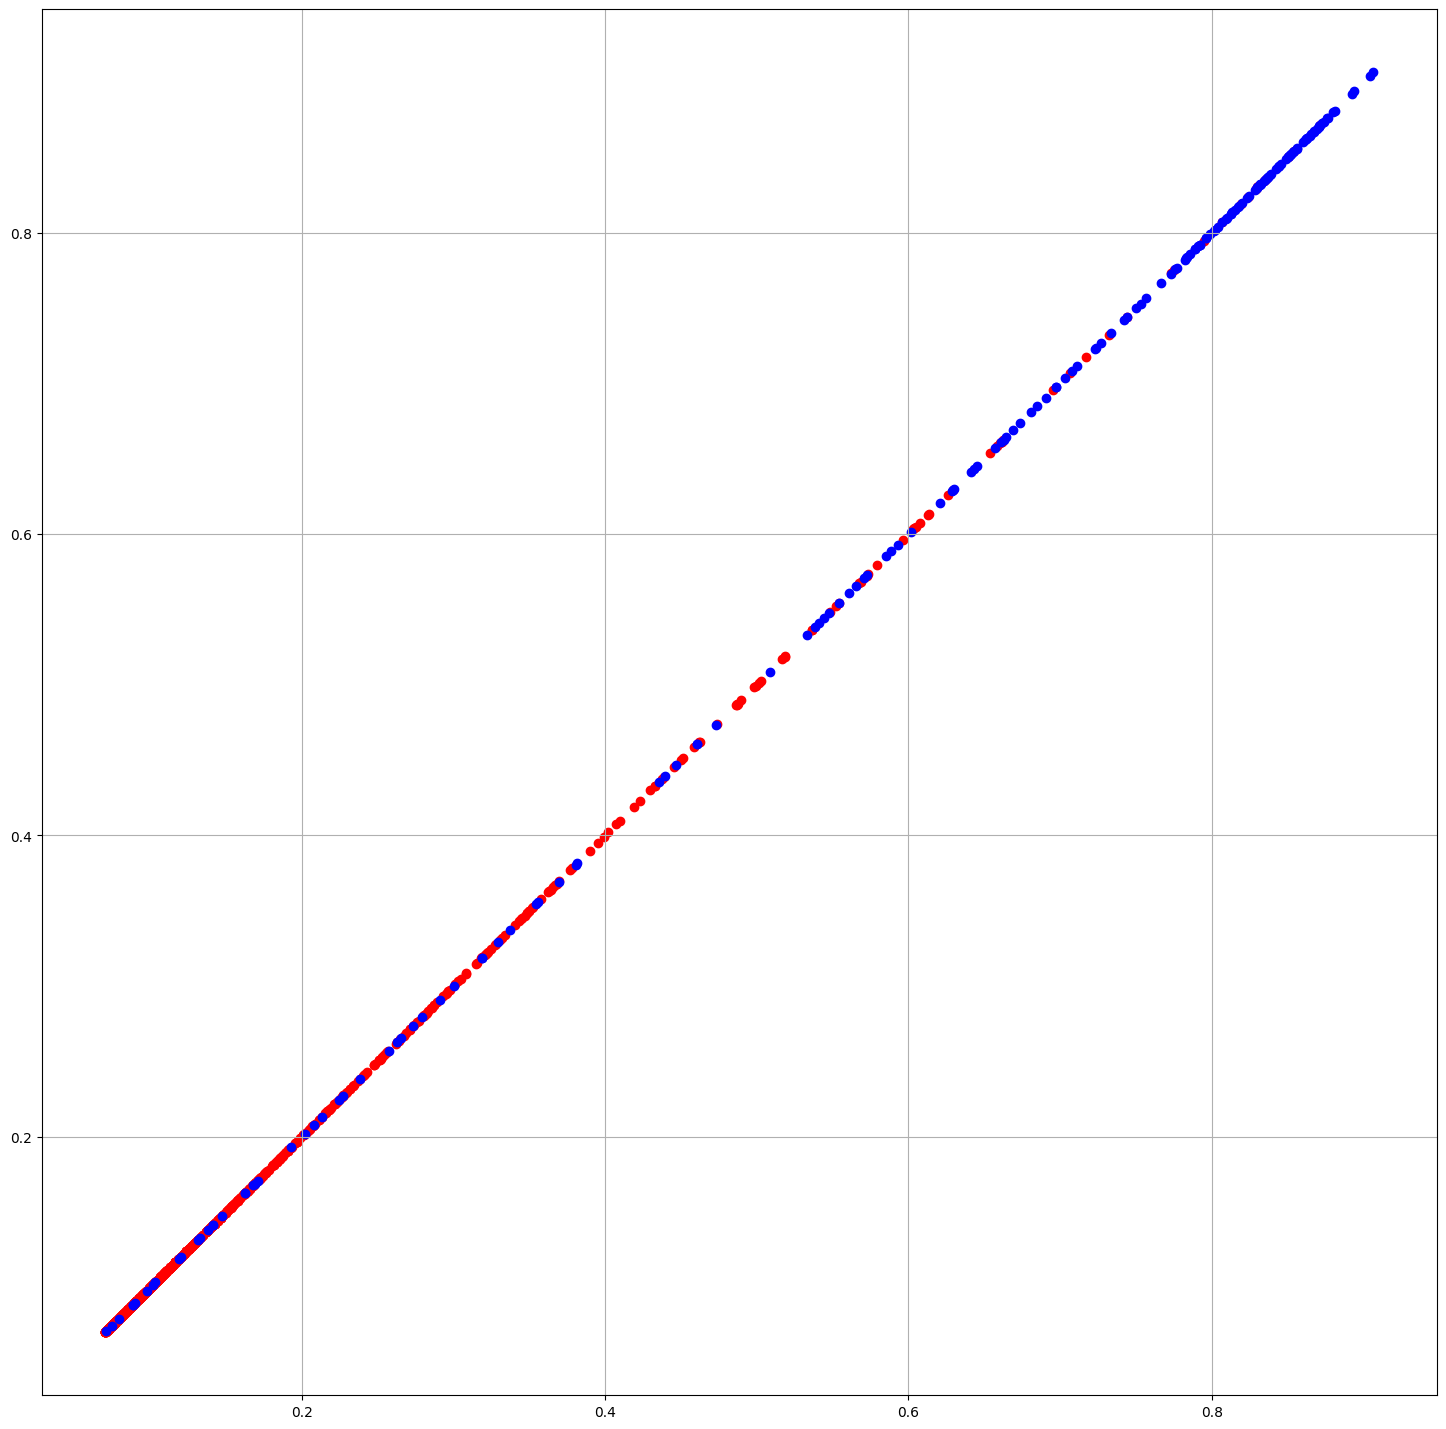

C:\Users\jeroe\anaconda3\envs\jupyterlab-debugger2\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jeroe\anaconda3\envs\jupyterlab-debugger2\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\jeroe\anaconda3\envs\jupyterlab-debugger2\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",

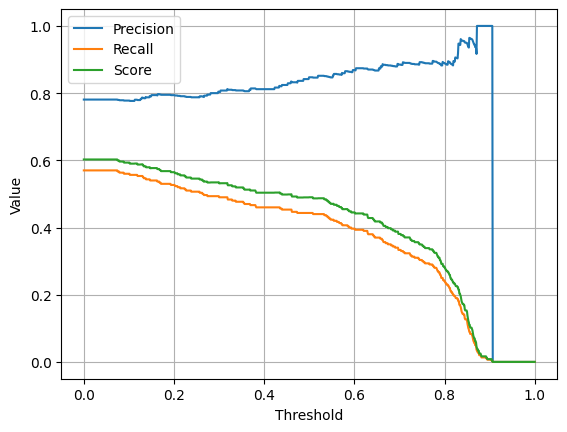

['tom']
Number of true positives before filter:  62  out of  63


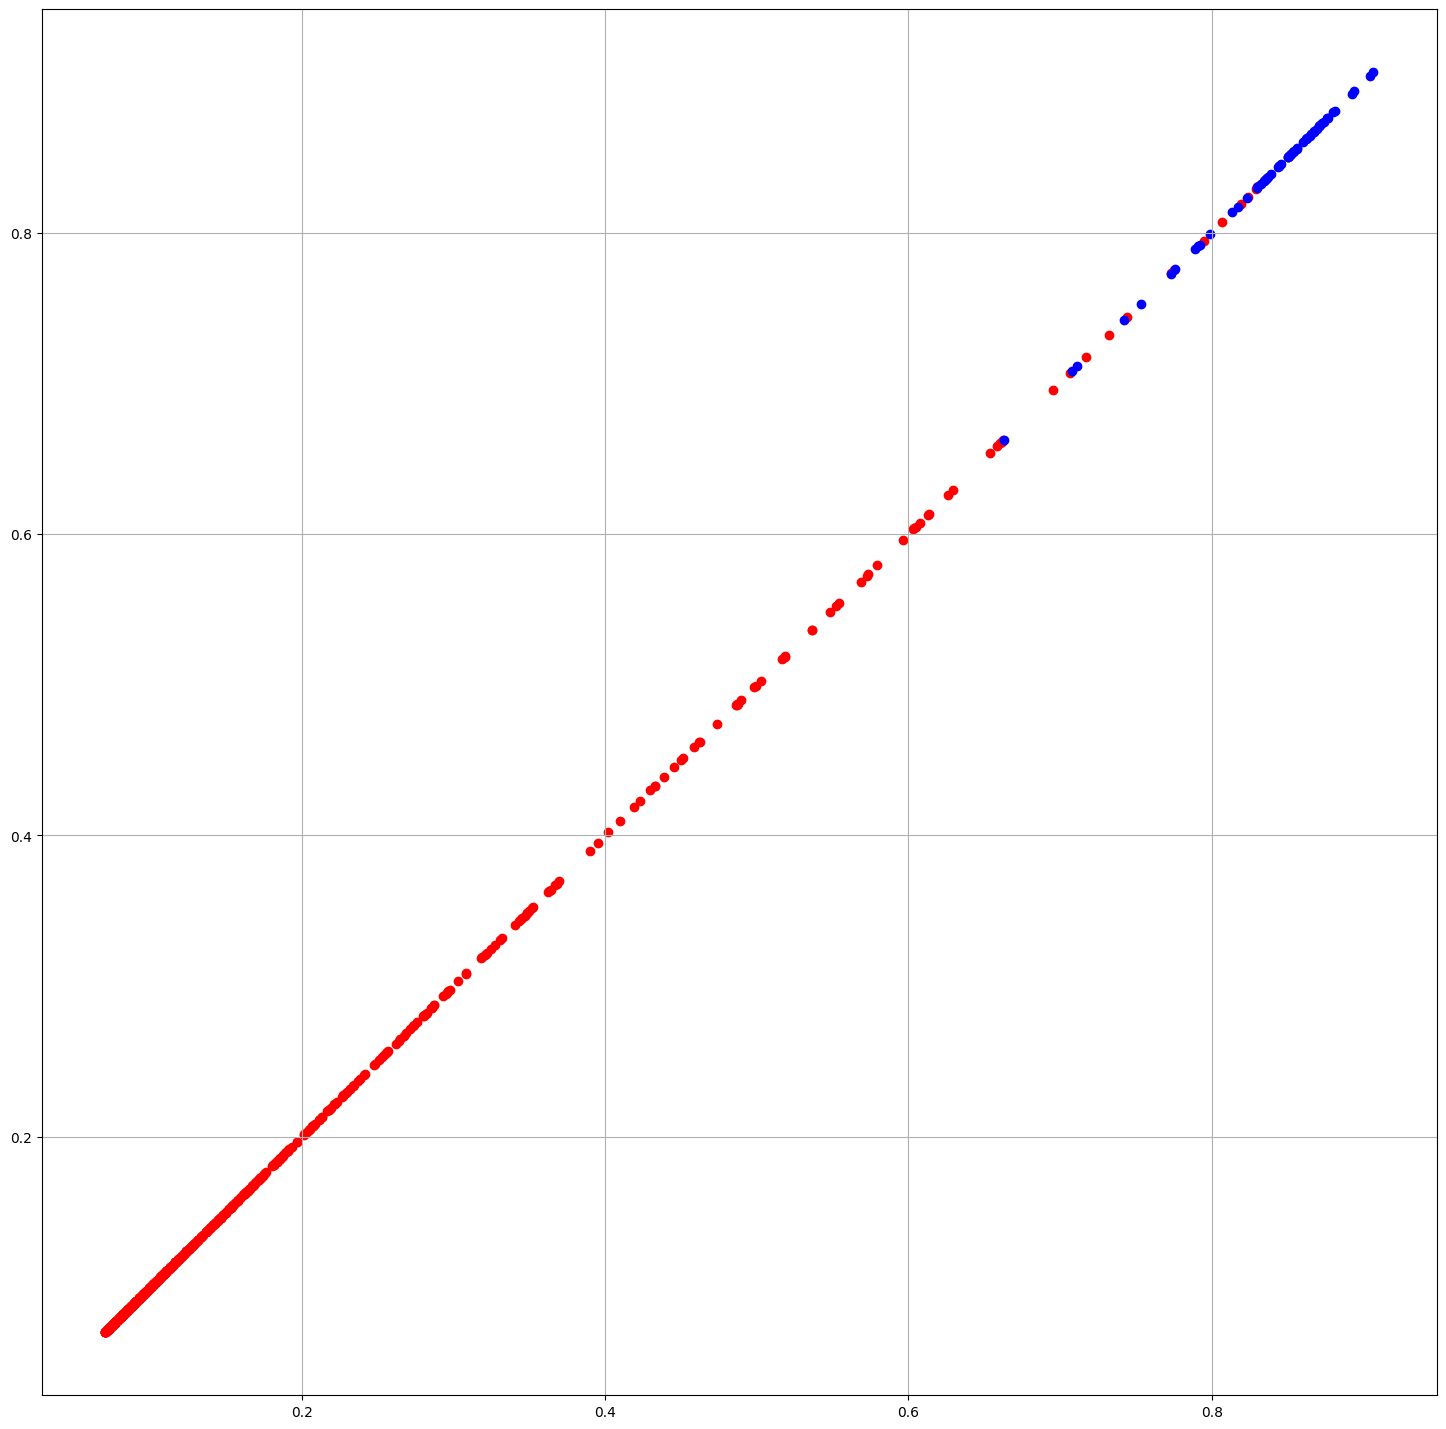

KeyboardInterrupt: 

In [8]:
importlib.reload(flg_model)
data.trained_model.state = 0
data.trained_model.calibrate_step_3 = True
for datasets in [['tom', 'ycw', 'aba', 'mba'], ['tom'], ['ycw'], ['aba'], ['mba']]:
    print(datasets)
    mod = copy.deepcopy(data.trained_model)
    mod.train_data_selector.datasets = datasets
    mod.train(data.test_data, data.test_data)

Number of true positives before filter:  41  out of  128


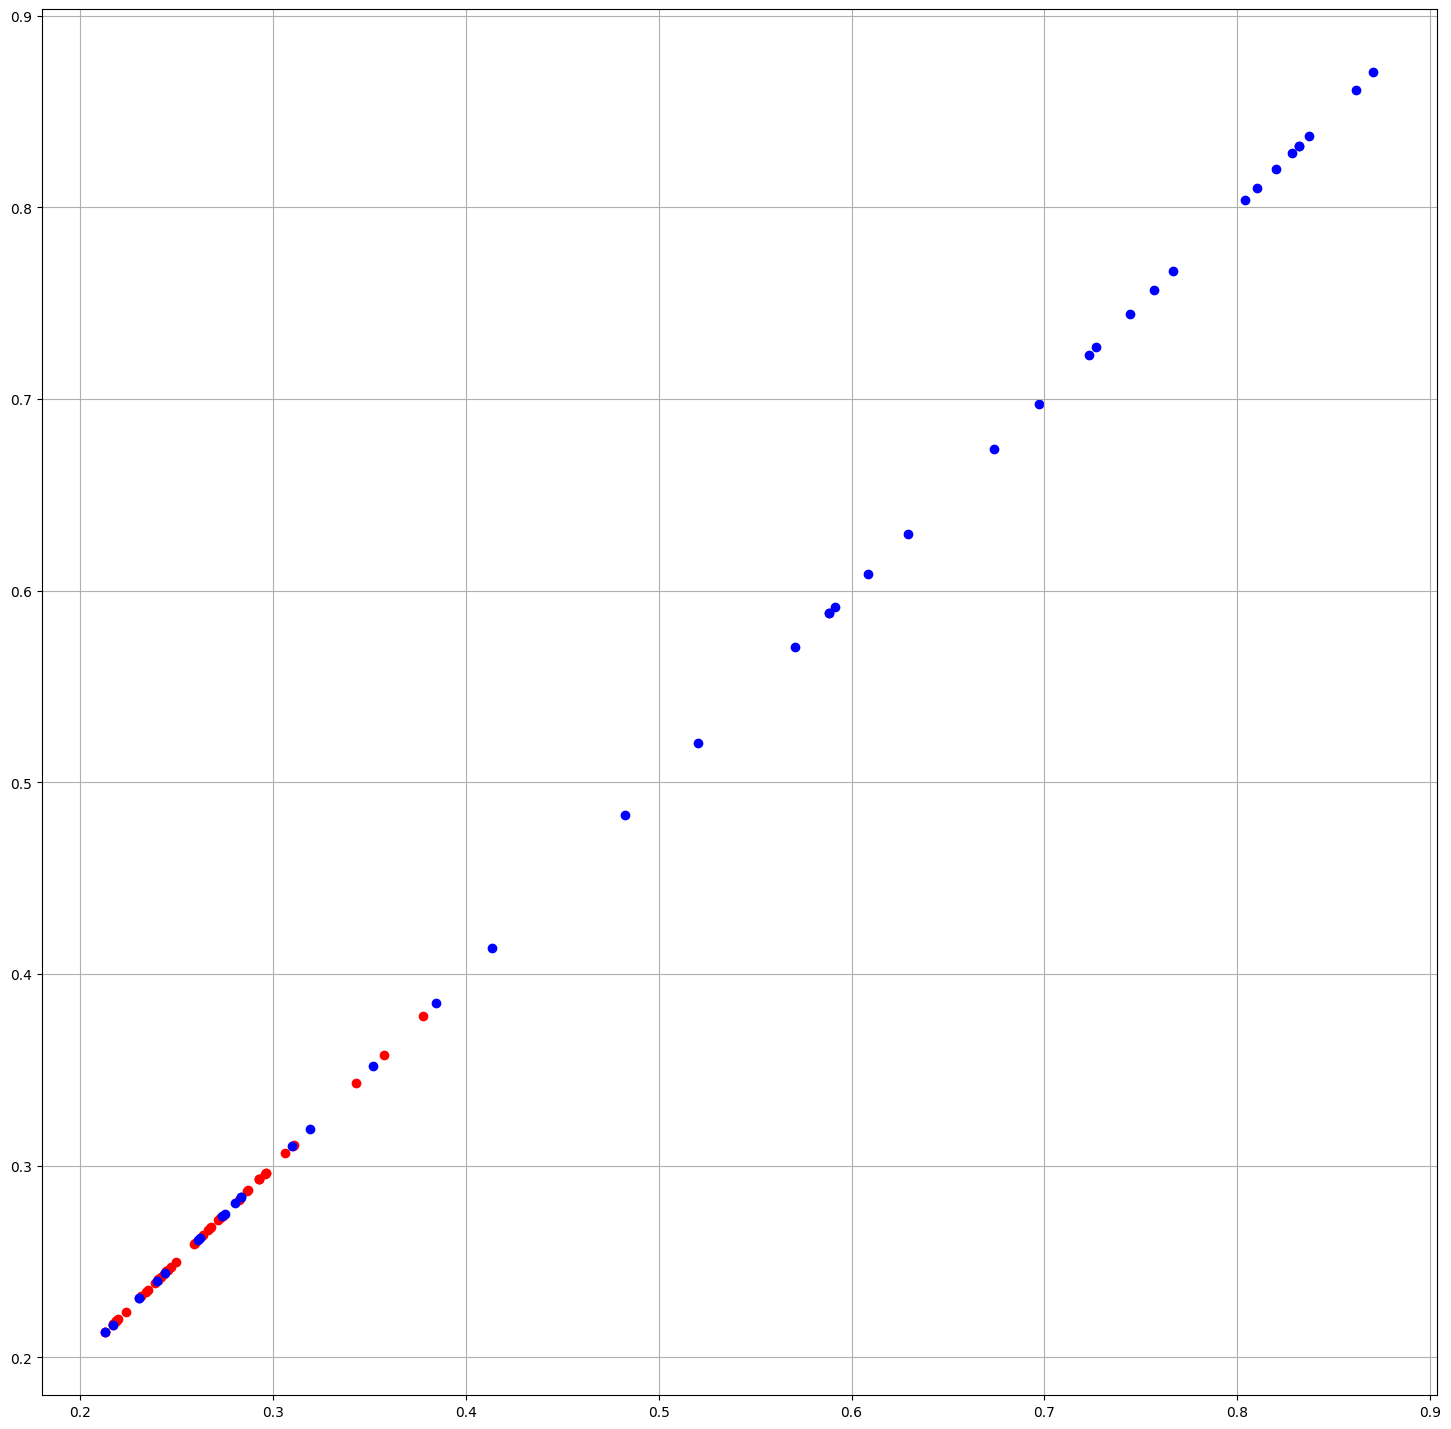

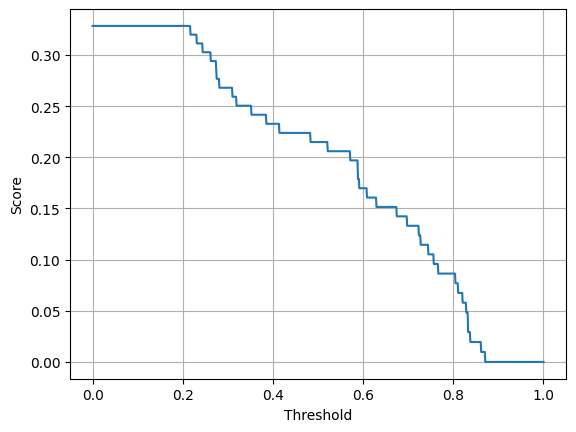

Number of true positives before filter:  142  out of  172


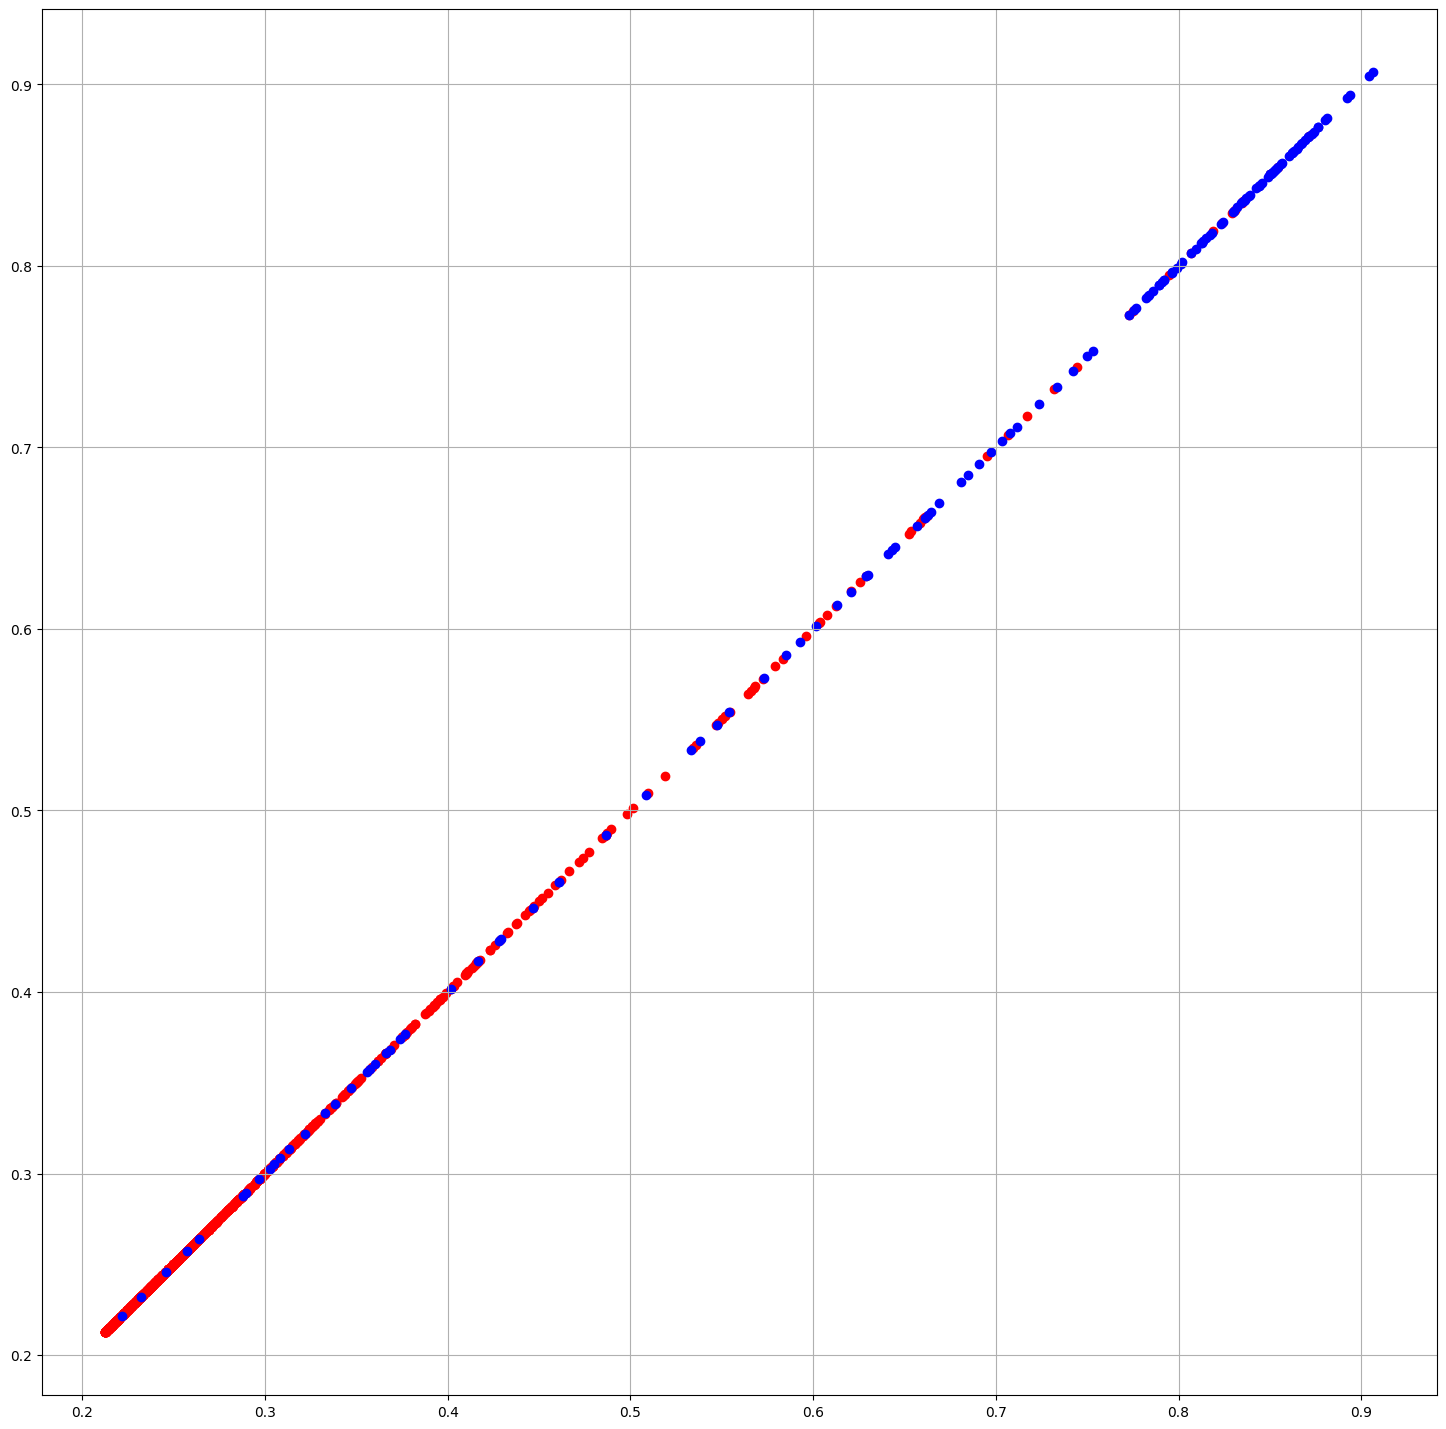

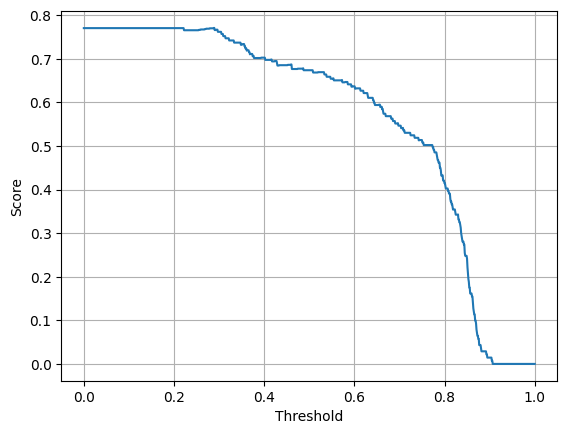

In [8]:
data.trained_model.state = 0
data.trained_model.calibrate_step_3 = True
mod = copy.deepcopy(data.trained_model)
mod.train_data_selector.datasets = ['tom', 'ycw', 'aba', 'mba']
partial_data = []
for d in data.test_data:
    if d.voxel_spacing<12:
        partial_data.append(d)
mod.train(partial_data,partial_data)
mod = copy.deepcopy(data.trained_model)
mod.train_data_selector.datasets = ['tom', 'ycw', 'aba', 'mba']
partial_data = []
for d in data.test_data:
    if d.voxel_spacing>=12:
        partial_data.append(d)
mod.train(partial_data,partial_data)

In [9]:
%debug


ERROR:root:No traceback has been produced, nothing to debug.


Number of true positives before filter:  74  out of  142


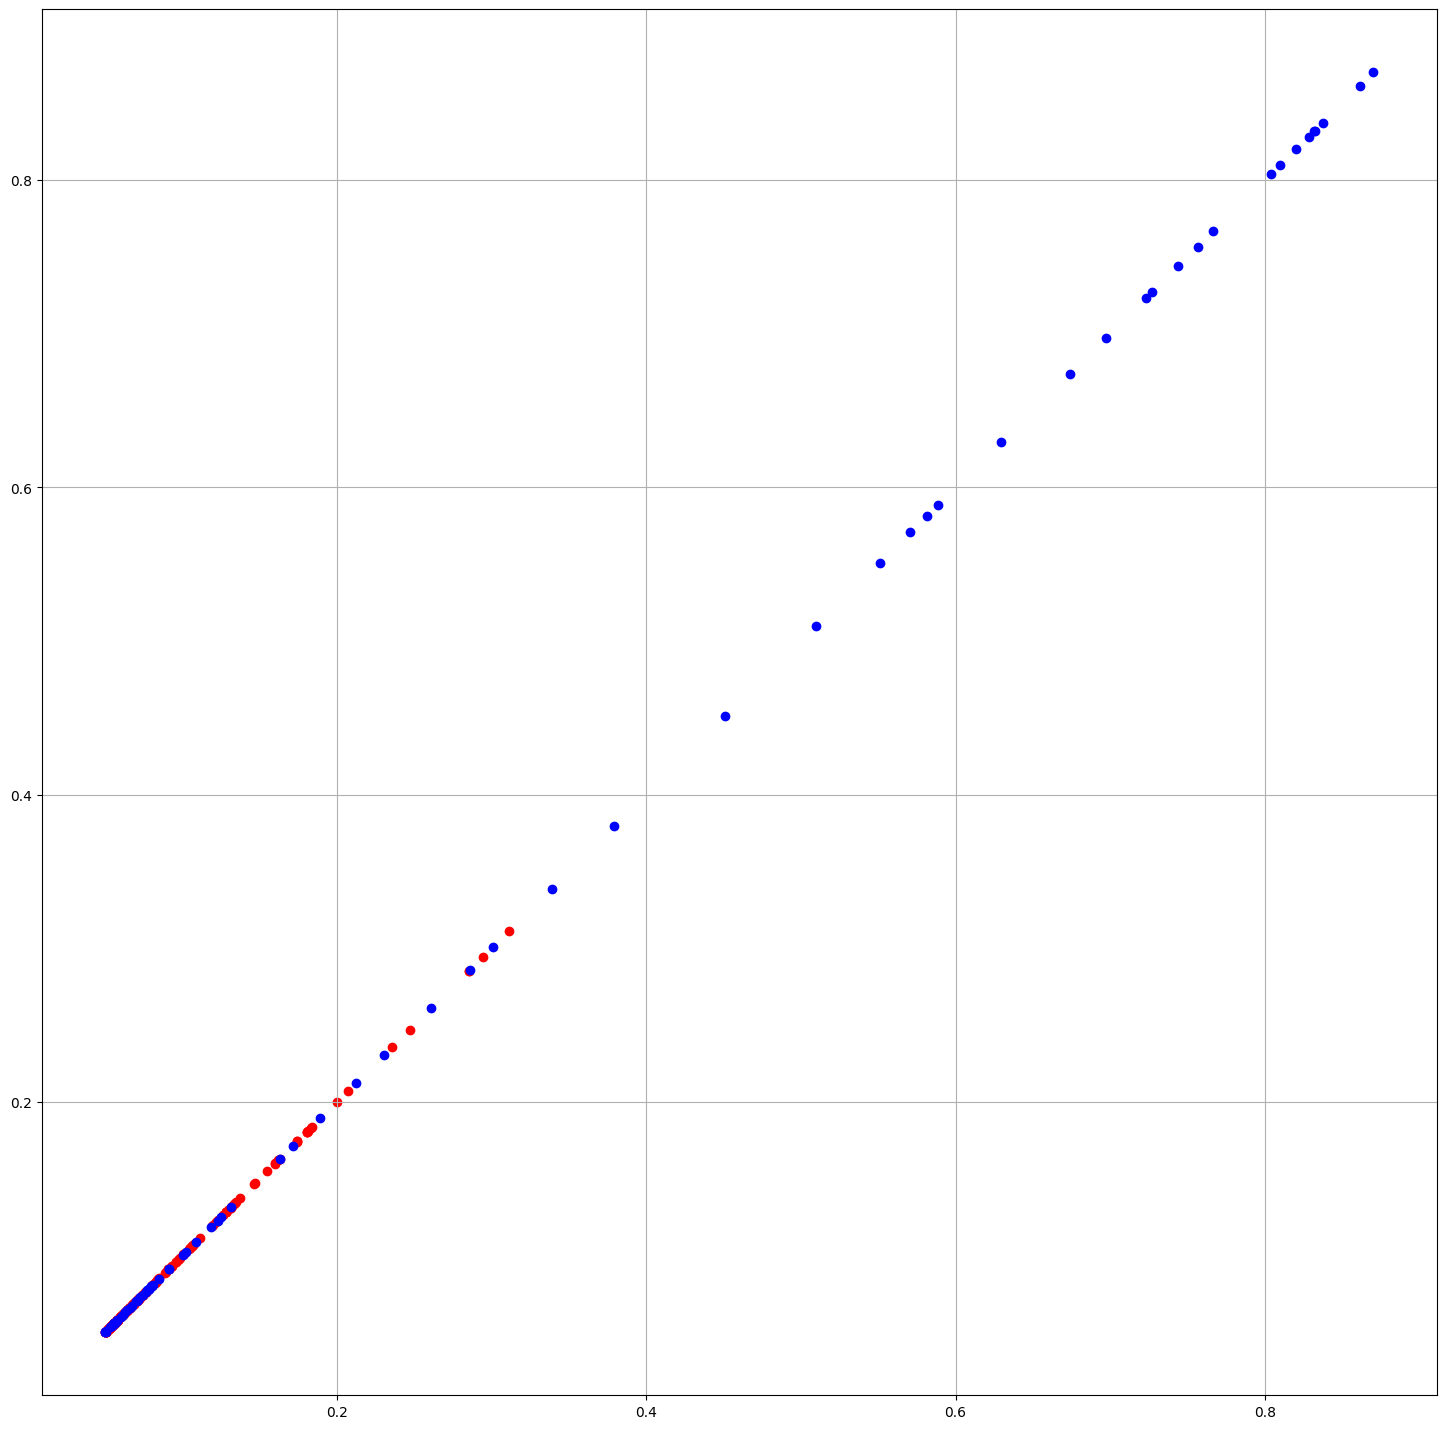

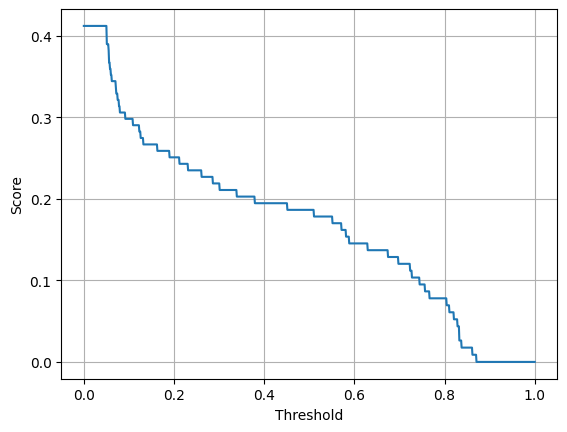

In [5]:
mod = copy.copy(data.trained_model)
mod.state = 0
mod.data_after_step2 = []
mod.step1Labels.confidence_threshold = 0.05
mod.calibrate_step_3 = True
mod.train_data_selector.datasets = ['mba']
mod.train(data.test_data, data.test_data)

Number of true positives before filter:  99  out of  142


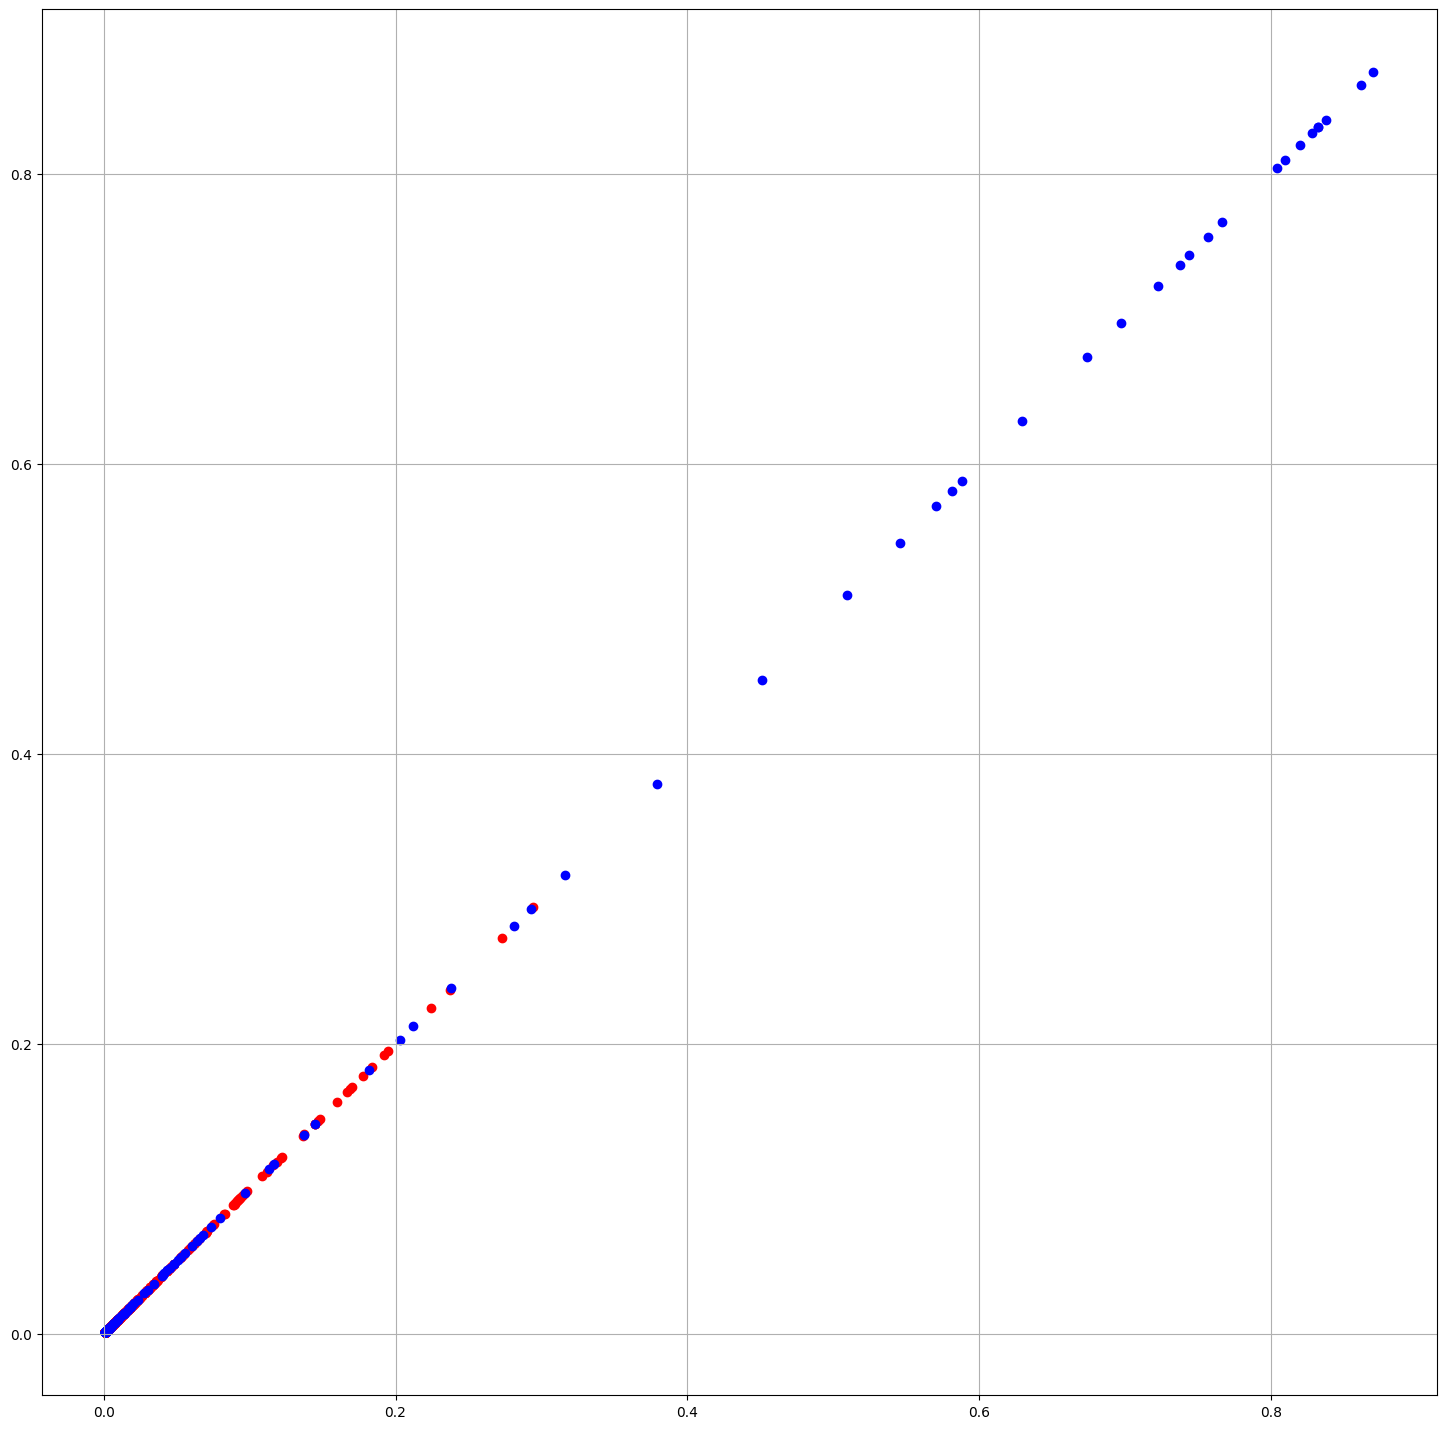

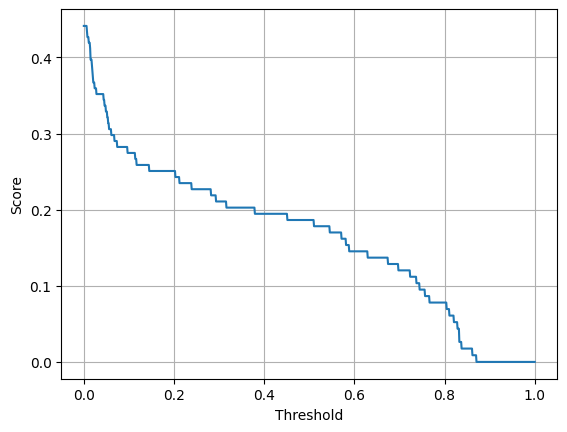

In [6]:
mod = copy.copy(data.trained_model)
mod.state = 0
mod.data_after_step2 = []
mod.step1Labels.confidence_threshold = 0.001
mod.calibrate_step_3 = True
mod.train_data_selector.datasets = ['mba']
mod.train(data.test_data, data.test_data)

Number of true positives before filter:  54  out of  75


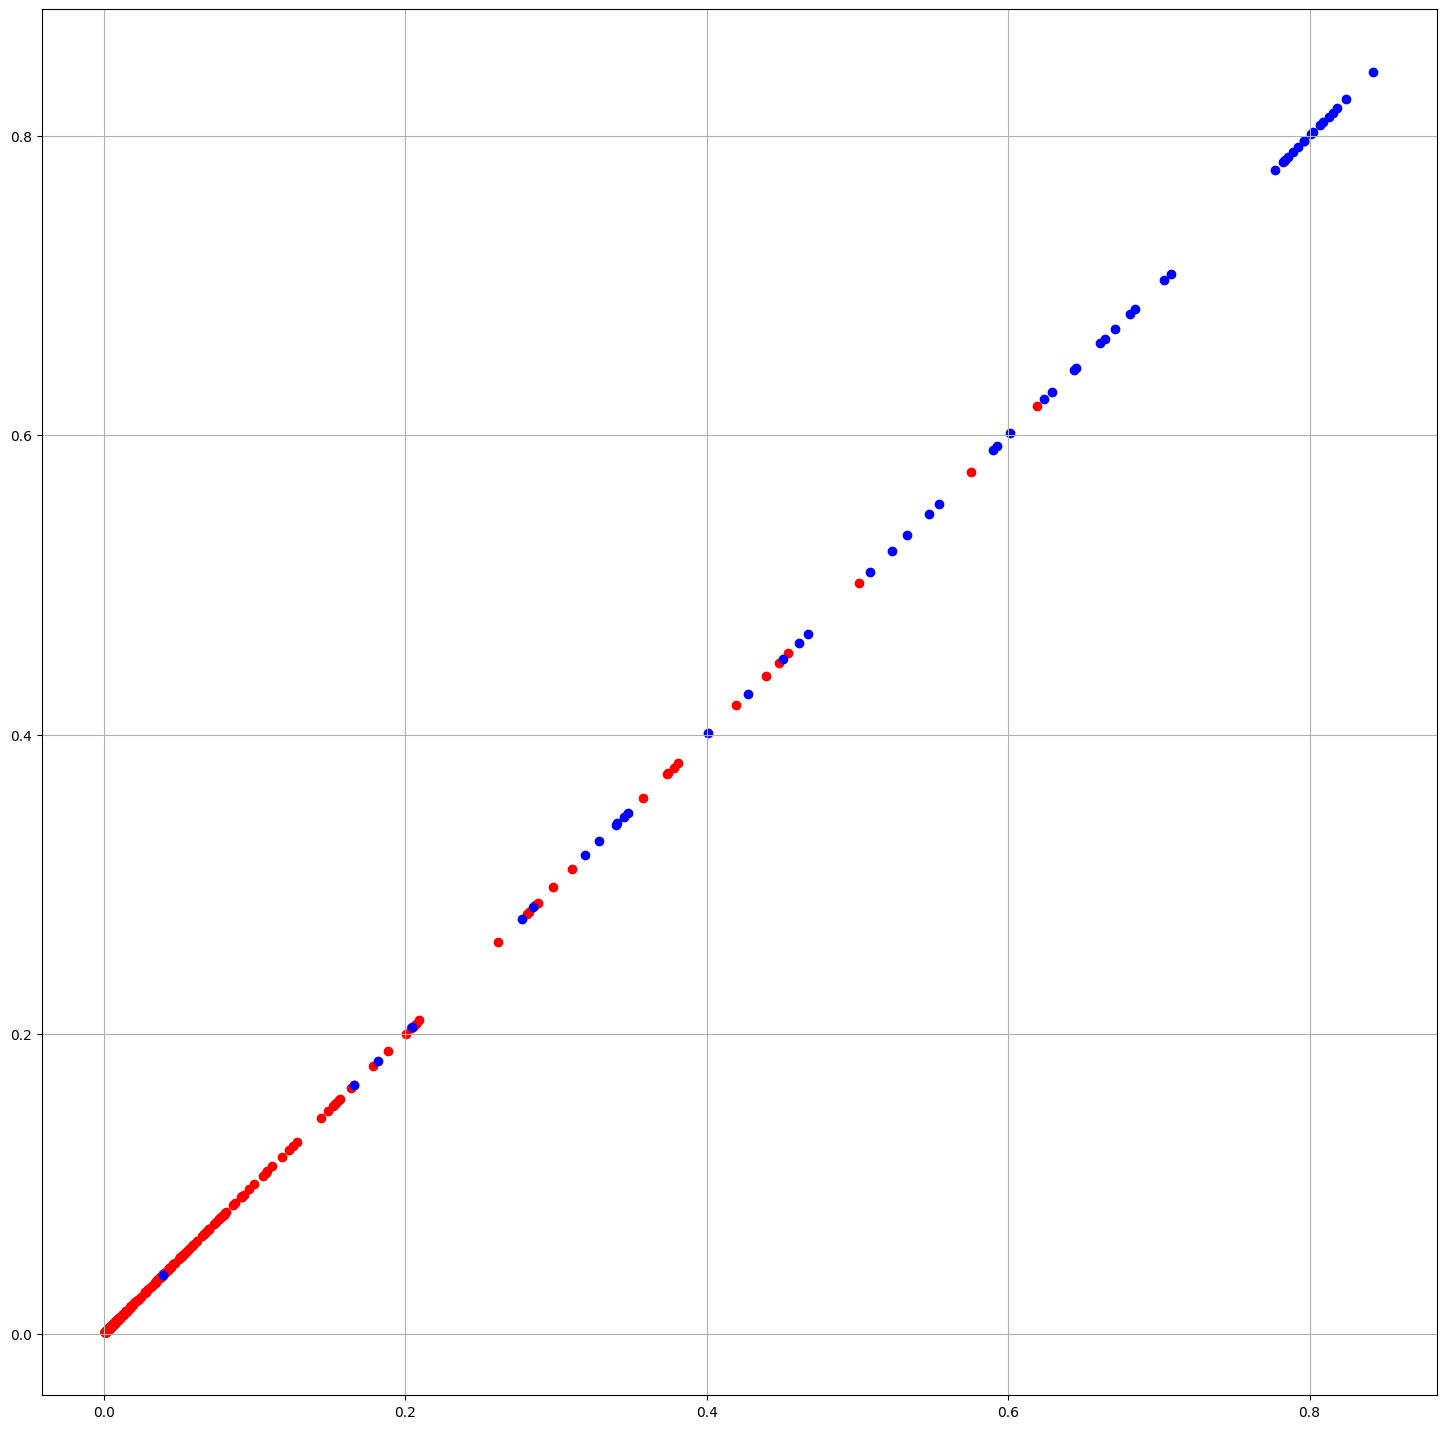

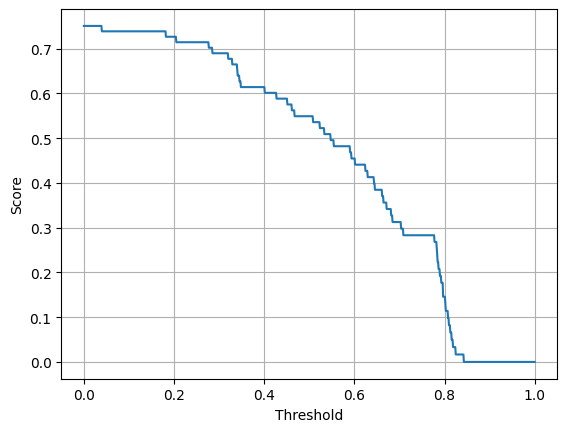

In [7]:
mod = copy.copy(data.trained_model)
mod.state = 0
mod.data_after_step2 = []
mod.step1Labels.confidence_threshold = 0.001
mod.calibrate_step_3 = True
mod.train_data_selector.datasets = ['aba']
mod.train(data.test_data, data.test_data)